4. Usando el algoritmo de Metrópolis, realice el muestreo de N = 1000 eventos de una
distribución estándar de Cauchy: $$A - f(x; 0; 1)$$.
$$f(x;0,1)=\frac{1}{\pi (1+x^2)}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def Metropolis(x0, Cauchy, NSteps=int(1e5), delta= 0.4):
    
    x = np.zeros((NSteps,1))
    
    # Prior
    x[0] = x0
    
    for i in tqdm(range(1,NSteps)):
        
        P0 = Cauchy(x[i-1])
        
        xf = x[i-1] + delta*2*(np.random.rand()-0.5)
        
        P1 = Cauchy(xf)
        
        alpha = np.minimum( 1, P1/P0 )
        g = np.random.rand()
        
        if alpha > g:
            x[i,0] = xf
        else:
            x[i,:] = x[i-1,:]
            
    return x[10000:,:]

In [3]:
def cauchy(x):
  return 1/(np.pi*(1+x**2))

100%|██████████| 99999/99999 [00:05<00:00, 19066.74it/s]


(array([9.88747701e-05, 3.95499080e-04, 3.95499080e-04, 7.41560775e-04,
        9.88747701e-04, 1.53255894e-03, 2.27411971e-03, 3.60892911e-03,
        4.15274034e-03, 5.04261327e-03, 5.38867497e-03, 5.38867497e-03,
        6.47629744e-03, 6.13023574e-03, 7.61335730e-03, 5.19092543e-03,
        5.38867497e-03, 5.09205066e-03, 4.59767681e-03, 6.17967313e-03,
        6.52573482e-03, 6.67404698e-03, 1.10245369e-02, 1.63143371e-02,
        1.93794549e-02, 2.10108886e-02, 2.55096907e-02, 2.59051898e-02,
        2.84264964e-02, 3.37162966e-02, 3.94015959e-02, 4.56307064e-02,
        5.75451162e-02, 6.59494716e-02, 7.64301973e-02, 8.41918667e-02,
        9.55130279e-02, 1.18204788e-01, 1.47125658e-01, 1.82176764e-01,
        2.17870556e-01, 2.59348522e-01, 3.00628738e-01, 3.11702713e-01,
        2.91581697e-01, 2.67406816e-01, 2.38535383e-01, 1.92509177e-01,
        1.60770376e-01, 1.30168635e-01, 1.04708382e-01, 9.02726651e-02,
        7.91986908e-02, 7.00033372e-02, 6.13023574e-02, 5.363956

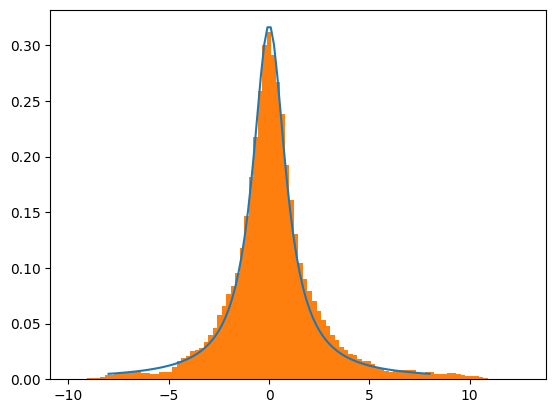

In [4]:
mu=2
sigma=0.5
x_=np.linspace(-8,8,100)

plt.plot(x_,cauchy(x_))

x0=np.array([-0.])
MCMC = Metropolis(x0,cauchy)

plt.hist(MCMC,density=True,bins=100,)